# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import matplotlib
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [3]:
from trainer import Trainer
from tracker import TrackerFactory
from agent import AgentFactory

agent_factory = AgentFactory()
tracker_factory = TrackerFactory()

trainer = Trainer(env, agent_factory, tracker_factory)
trainer.describe_environment()


Seed:  1
Brain names:  ['ReacherBrain']
{'ReacherBrain': <unityagents.brain.BrainParameters object at 0x7f0e356b7898>}
Number of agents: 20
Size of each action: 4
Type of action space: continuous
There are 20 agents. Each observes a state with length: 33 and takes an action of size 4
Type of state space: continuous
State vector type:  (33,)
The state for the first agent looks like:
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


Agent is using:  cuda:0


/home/safdar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/data/code/nd/deep-learning/reinforced/DRL-Continuous-Control/agent.py:158: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode :: 0	Scores:	Centennial: 0.879	Mean: 0.879	Min: 0.100	Max:1.630	Duration: 6.33s
Episode :: 1	Scores:	Centennial: 1.205	Mean: 1.532	Min: 0.400	Max:2.650	Duration: 6.46s
Episode :: 2	Scores:	Centennial: 1.536	Mean: 2.197	Min: 1.130	Max:3.510	Duration: 6.64s
Episode :: 3	Scores:	Centennial: 1.685	Mean: 2.130	Min: 1.300	Max:3.170	Duration: 6.69s
Episode :: 4	Scores:	Centennial: 1.725	Mean: 1.888	Min: 1.020	Max:2.970	Duration: 6.84s
Episode :: 5	Scores:	Centennial: 1.774	Mean: 2.016	Min: 0.350	Max:4.610	Duration: 6.92s
Episode :: 6	Scores:	Centennial: 1.991	Mean: 3.294	Min: 1.290	Max:5.080	Duration: 7.32s
Episode :: 7	Scores:	Centennial: 2.099	Mean: 2.854	Min: 0.210	Max:4.230	Duration: 7.51s
Episode :: 8	Scores:	Centennial: 2.197	Mean: 2.978	Min: 1.550	Max:5.270	Duration: 7.62s
Episode :: 9	Scores:	Centennial: 2.397	Mean: 4.202	Min: 1.540	Max:6.860	Duration: 7.78s
Episode :: 10	Scores:	Centennial: 2.704	Mean: 5.773	Min: 3.320	Max:8.780	Duration: 8.02s
Episode :: 11	Scores:	Centennia

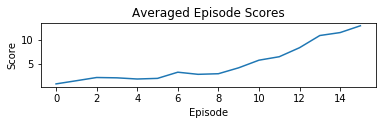

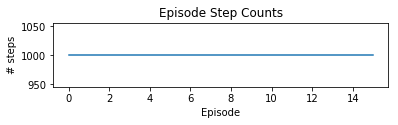

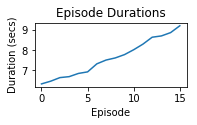

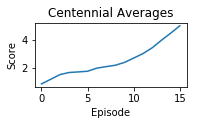

Episode :: 16	Scores:	Centennial: 5.526	Mean: 14.132	Min: 8.050	Max:21.700	Duration: 9.25s
Episode :: 17	Scores:	Centennial: 6.205	Mean: 17.748	Min: 9.820	Max:27.770	Duration: 9.65s
Episode :: 18	Scores:	Centennial: 6.621	Mean: 14.095	Min: 7.090	Max:21.430	Duration: 9.83s
Episode :: 19	Scores:	Centennial: 7.155	Mean: 17.311	Min: 7.790	Max:33.640	Duration: 10.59s
Episode :: 20	Scores:	Centennial: 7.675	Mean: 18.082	Min: 12.070	Max:31.840	Duration: 10.16s
Episode :: 21	Scores:	Centennial: 8.161	Mean: 18.364	Min: 8.560	Max:34.020	Duration: 10.42s
Episode :: 22	Scores:	Centennial: 8.587	Mean: 17.946	Min: 12.120	Max:26.250	Duration: 11.16s
Episode :: 23	Scores:	Centennial: 9.056	Mean: 19.854	Min: 12.420	Max:30.930	Duration: 11.17s
Episode :: 24	Scores:	Centennial: 9.617	Mean: 23.070	Min: 15.930	Max:30.370	Duration: 11.38s
Episode :: 25	Scores:	Centennial: 10.168	Mean: 23.958	Min: 12.250	Max:31.130	Duration: 11.41s
Episode :: 26	Scores:	Centennial: 10.716	Mean: 24.954	Min: 18.440	Max:31.780	

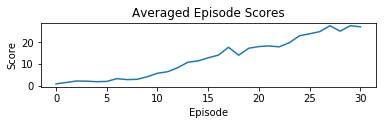

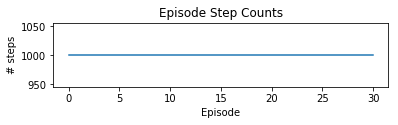

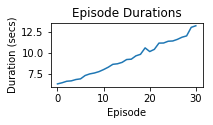

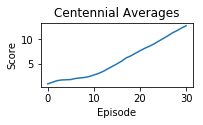

Episode :: 31	Scores:	Centennial: 13.329	Mean: 29.555	Min: 22.540	Max:37.620	Duration: 12.69s
Episode :: 32	Scores:	Centennial: 13.755	Mean: 27.410	Min: 20.040	Max:33.830	Duration: 13.12s
Episode :: 33	Scores:	Centennial: 14.147	Mean: 27.077	Min: 19.390	Max:35.270	Duration: 13.58s
Episode :: 34	Scores:	Centennial: 14.581	Mean: 29.321	Min: 17.150	Max:35.320	Duration: 13.89s
Episode :: 35	Scores:	Centennial: 14.978	Mean: 28.887	Min: 24.350	Max:35.430	Duration: 13.67s
Episode :: 36	Scores:	Centennial: 15.466	Mean: 33.030	Min: 24.770	Max:38.651	Duration: 13.90s
Episode :: 37	Scores:	Centennial: 15.899	Mean: 31.921	Min: 27.210	Max:36.240	Duration: 14.05s
Episode :: 38	Scores:	Centennial: 16.381	Mean: 34.708	Min: 27.500	Max:37.050	Duration: 14.52s
Episode :: 39	Scores:	Centennial: 16.776	Mean: 32.181	Min: 24.510	Max:36.820	Duration: 14.77s
Episode :: 40	Scores:	Centennial: 17.200	Mean: 34.140	Min: 24.470	Max:37.900	Duration: 14.58s
Episode :: 41	Scores:	Centennial: 17.599	Mean: 33.963	Min: 3

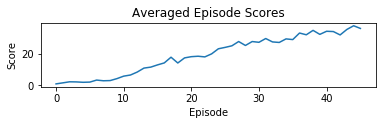

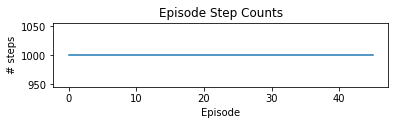

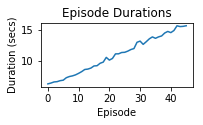

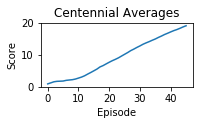

Episode :: 46	Scores:	Centennial: 19.442	Mean: 33.911	Min: 30.160	Max:37.420	Duration: 16.10s
Episode :: 47	Scores:	Centennial: 19.758	Mean: 34.624	Min: 27.700	Max:38.300	Duration: 17.55s
Episode :: 48	Scores:	Centennial: 20.031	Mean: 33.118	Min: 22.880	Max:36.490	Duration: 16.44s
Episode :: 49	Scores:	Centennial: 20.329	Mean: 34.939	Min: 31.590	Max:38.821	Duration: 16.56s
Episode :: 50	Scores:	Centennial: 20.669	Mean: 37.665	Min: 33.710	Max:39.551	Duration: 17.36s
Episode :: 51	Scores:	Centennial: 20.962	Mean: 35.914	Min: 29.690	Max:38.821	Duration: 17.21s
Episode :: 52	Scores:	Centennial: 21.256	Mean: 36.532	Min: 31.140	Max:38.981	Duration: 16.85s
Episode :: 53	Scores:	Centennial: 21.528	Mean: 35.955	Min: 32.660	Max:38.621	Duration: 16.77s
Episode :: 54	Scores:	Centennial: 21.775	Mean: 35.100	Min: 32.040	Max:38.340	Duration: 17.09s
Episode :: 55	Scores:	Centennial: 22.052	Mean: 37.278	Min: 34.840	Max:39.541	Duration: 16.65s
Episode :: 56	Scores:	Centennial: 22.316	Mean: 37.117	Min: 3

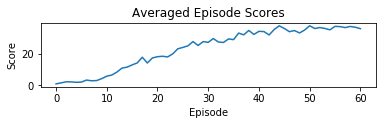

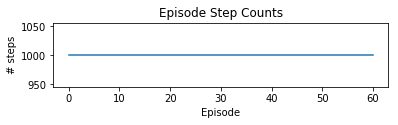

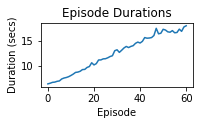

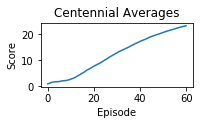

Episode :: 61	Scores:	Centennial: 23.419	Mean: 33.694	Min: 27.760	Max:37.210	Duration: 17.87s
Episode :: 62	Scores:	Centennial: 23.620	Mean: 36.084	Min: 31.940	Max:38.330	Duration: 17.89s
Episode :: 63	Scores:	Centennial: 23.825	Mean: 36.736	Min: 33.870	Max:38.500	Duration: 17.84s
Episode :: 64	Scores:	Centennial: 24.024	Mean: 36.771	Min: 33.560	Max:38.971	Duration: 17.77s
Episode :: 65	Scores:	Centennial: 24.200	Mean: 35.639	Min: 32.970	Max:39.271	Duration: 17.71s
Episode :: 66	Scores:	Centennial: 24.374	Mean: 35.839	Min: 30.210	Max:38.170	Duration: 17.55s
Episode :: 67	Scores:	Centennial: 24.562	Mean: 37.187	Min: 33.760	Max:39.261	Duration: 17.74s
Episode :: 68	Scores:	Centennial: 24.731	Mean: 36.170	Min: 31.620	Max:38.881	Duration: 17.58s
Episode :: 69	Scores:	Centennial: 24.910	Mean: 37.276	Min: 32.770	Max:39.261	Duration: 17.63s
Episode :: 70	Scores:	Centennial: 25.087	Mean: 37.479	Min: 33.000	Max:39.411	Duration: 17.66s
Episode :: 71	Scores:	Centennial: 25.249	Mean: 36.788	Min: 3

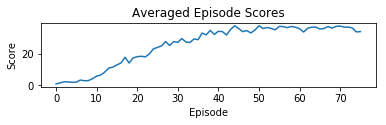

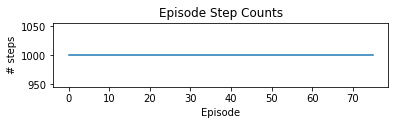

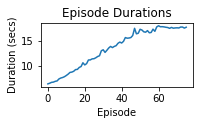

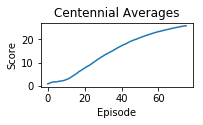

Episode :: 76	Scores:	Centennial: 25.885	Mean: 34.360	Min: 31.340	Max:37.080	Duration: 17.57s
Episode :: 77	Scores:	Centennial: 26.012	Mean: 35.809	Min: 31.210	Max:38.420	Duration: 16.79s
Episode :: 78	Scores:	Centennial: 26.119	Mean: 34.472	Min: 28.870	Max:37.670	Duration: 16.84s
Episode :: 79	Scores:	Centennial: 26.239	Mean: 35.712	Min: 31.200	Max:37.890	Duration: 17.01s
Episode :: 80	Scores:	Centennial: 26.344	Mean: 34.770	Min: 30.960	Max:38.941	Duration: 17.00s
Episode :: 81	Scores:	Centennial: 26.463	Mean: 36.074	Min: 33.630	Max:38.491	Duration: 16.92s
Episode :: 82	Scores:	Centennial: 26.559	Mean: 34.407	Min: 30.160	Max:37.640	Duration: 16.89s
Episode :: 83	Scores:	Centennial: 26.658	Mean: 34.906	Min: 28.080	Max:38.190	Duration: 17.29s
Episode :: 84	Scores:	Centennial: 26.747	Mean: 34.231	Min: 29.990	Max:37.040	Duration: 17.23s
Episode :: 85	Scores:	Centennial: 26.780	Mean: 29.543	Min: 24.380	Max:34.570	Duration: 17.07s
Episode :: 86	Scores:	Centennial: 26.844	Mean: 32.379	Min: 2

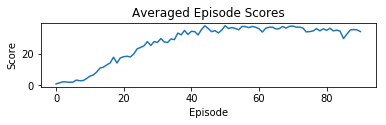

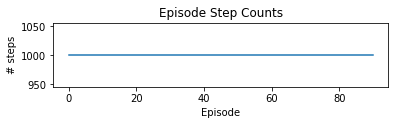

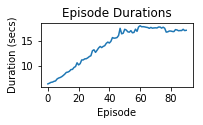

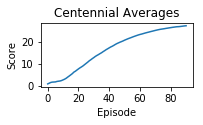

Episode :: 91	Scores:	Centennial: 27.295	Mean: 36.427	Min: 33.960	Max:38.591	Duration: 16.91s
Episode :: 92	Scores:	Centennial: 27.366	Mean: 33.851	Min: 29.030	Max:37.850	Duration: 17.01s
Episode :: 93	Scores:	Centennial: 27.436	Mean: 34.027	Min: 31.190	Max:37.880	Duration: 17.05s
Episode :: 94	Scores:	Centennial: 27.500	Mean: 33.490	Min: 27.290	Max:36.320	Duration: 16.94s
Episode :: 95	Scores:	Centennial: 27.578	Mean: 34.931	Min: 31.210	Max:37.570	Duration: 16.89s
Episode :: 96	Scores:	Centennial: 27.657	Mean: 35.315	Min: 32.490	Max:37.440	Duration: 17.04s
Episode :: 97	Scores:	Centennial: 27.718	Mean: 33.605	Min: 26.960	Max:35.760	Duration: 16.96s
Episode :: 98	Scores:	Centennial: 27.763	Mean: 32.210	Min: 24.570	Max:36.130	Duration: 17.09s
Episode :: 99	Scores:	Centennial: 27.805	Mean: 31.902	Min: 28.480	Max:36.010	Duration: 17.37s
Episode :: 100	Scores:	Centennial: 28.128	Mean: 33.196	Min: 26.850	Max:36.460	Duration: 17.05s
Episode :: 101	Scores:	Centennial: 28.459	Mean: 34.651	Min:

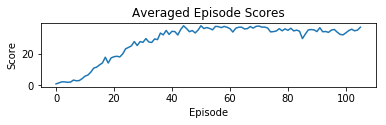

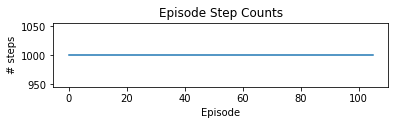

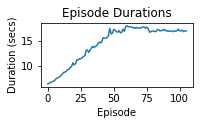

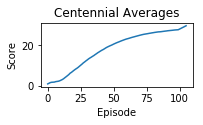

Episode :: 106	Scores:	Centennial: 30.105	Mean: 34.505	Min: 28.220	Max:38.521	Duration: 17.12s
Goal achieved! Episodes: 106, Average score (across all agents): 30.11, Time to train: Nonemin


In [4]:
agent, tracker = trainer.train(n_episodes=200, plot_every=15, learn_every=20, iterations_per_learn=10, goal_score=30.0)

Performance plots


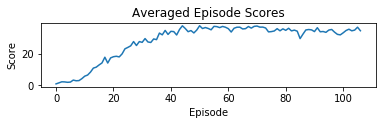

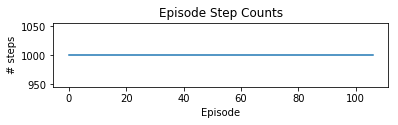

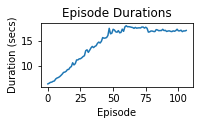

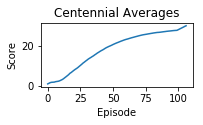

In [5]:
print ("Performance plots")
tracker.plot_performance()

Now we will utilize the agent that was trained above, to play an actual game in the same environment.

In [15]:
print("Making agent play in the existing environment")
trainer.play(agent)

Making agent play in the existing environment
Total score (averaged over 20 agents) this episode: 26.97049939716235


In [16]:
env.close()